In [2]:
## Mean Reversion Trading Strategy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [2]:
df = yf.download(tickers='TSLA', period='1000d', interval='1d')




[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500
2019-01-15,22.333332,23.253332,22.299999,22.962000,22.962000,90849000
2019-01-16,22.985332,23.466667,22.900000,23.070000,23.070000,70375500
2019-01-17,23.080667,23.433332,22.943333,23.153999,23.153999,55150500
2019-01-18,21.533333,21.808666,19.982000,20.150667,20.150667,362262000
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [4]:
#defining a function to calculate the moving average of close price stock data

In [5]:
def ma(data, number=20, column='Close'):
    return data[column].rolling(window=number).mean()

In [6]:
df['MovingAverage']=ma(df)
df['Rat']= df['Close']/df['MovingAverage']
#df['simple_returns']= df.pct_change(1)['Close']
#df['log_returns']=np.log(1+df['simple_returns'])

In [7]:
#The close price/moving average is a ratio that will help us gauge how far away the current moving price is from the mean

In [8]:
df['Rat'].describe()

count    981.000000
mean       1.021546
std        0.115643
min        0.536820
25%        0.955280
50%        1.013502
75%        1.077379
max        1.550250
Name: Rat, dtype: float64

In [9]:
percentiles=[15,20,50,80,85]
ratios=df['Rat'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.91948942, 0.93887647, 1.0135016 , 1.10295486, 1.13375464])

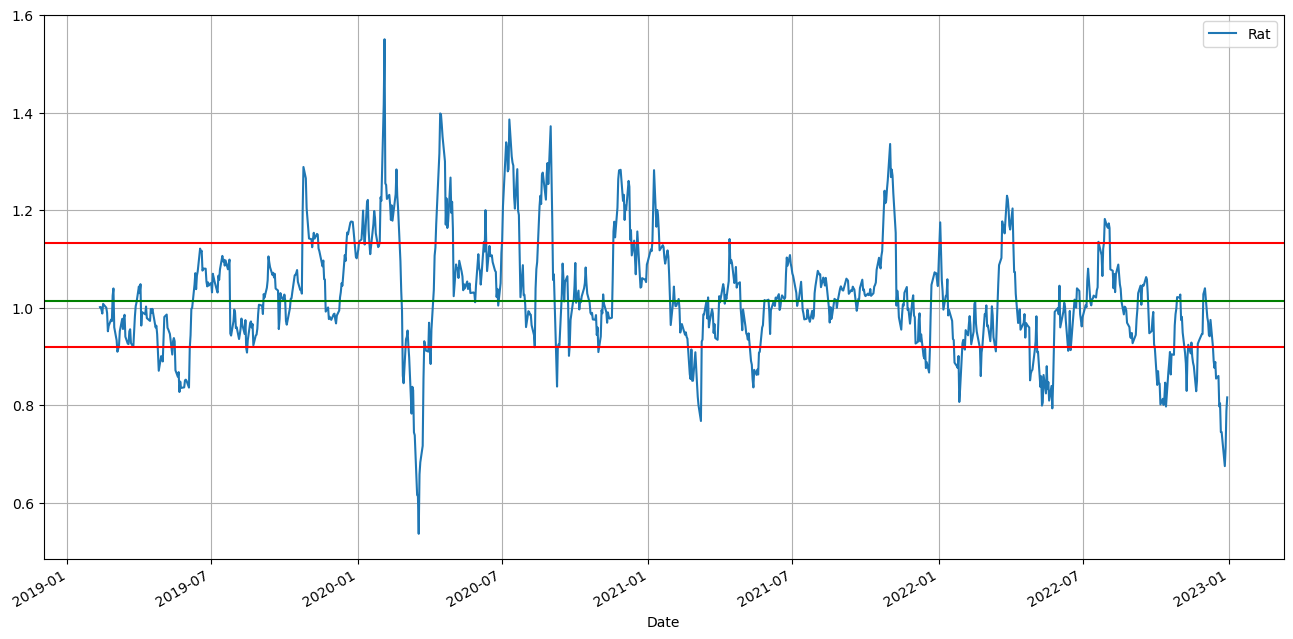

In [10]:
plt.figure(figsize=(16,8))
df['Rat'].dropna().plot(legend=True)
plt.grid()
plt.axhline(percentile_values[0],c='red',label='15th percentile')
plt.axhline(percentile_values[2],c='green',label='50th percentile')
plt.axhline(percentile_values[4],c='red',label='85th percentile')
plt.show()


In [11]:
#the 1 on the y axis is the mean price where closeprice=movingavg

In [12]:
#now we buy if the close price is less than the 15th percentile, and sell if it is greater than the 85th percentile. create another column documenting -1 to sell and 1 to buy
sell=percentile_values[-1]
buy=percentile_values[0]
buy


0.9194894211613397

In [13]:
df['BuyOrSell']= np.where(df['Rat']>sell,-1, 0)
df['BuyOrSell']= np.where(df['Rat']<buy,1,0)
df['BuyOrSell']= df['BuyOrSell'].ffill()

df.head(60)

,Open,High,Low,Close,Adj Close,Volume,MovingAverage,Rat,BuyOrSell
Date,,,,,,,,,
2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500,NaN,NaN,0
2019-01-15,22.333332,23.253332,22.299999,22.962000,22.962000,90849000,NaN,NaN,0
2019-01-16,22.985332,23.466667,22.900000,23.070000,23.070000,70375500,NaN,NaN,0
2019-01-17,23.080667,23.433332,22.943333,23.153999,23.153999,55150500,NaN,NaN,0
2019-01-18,21.533333,21.808666,19.982000,20.150667,20.150667,362262000,NaN,NaN,0
2019-01-22,20.321333,20.533333,19.700001,19.927999,19.927999,181000500,NaN,NaN,0
2019-01-23,19.500000,19.633333,18.779333,19.172667,19.172667,187950000,NaN,NaN,0
2019-01-24,18.868668,19.578667,18.618668,19.434000,19.434000,120183000,NaN,NaN,0
2019-01-25,19.625999,19.901333,19.303333,19.802668,19.802668,108744000,NaN,NaN,0


In [14]:
df['Buy']=np.where(df.BuyOrSell == 1,df['Close'],np.nan)
df['Sell']=np.where(df.BuyOrSell == -1,df['Close'],np.nan)

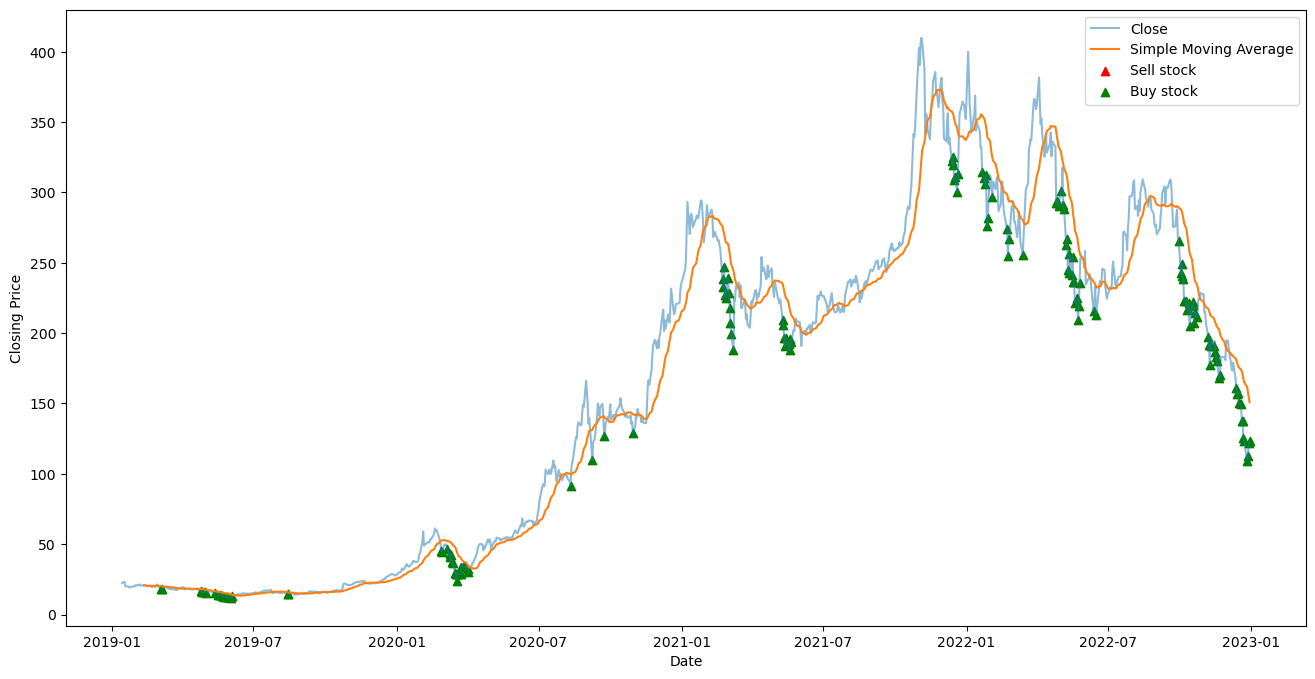

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['MovingAverage'],alpha=1,label='Simple Moving Average')
plt.scatter(df.index, df['Sell'], color='red',label='Sell stock',marker='^',alpha=1)

plt.scatter(df.index, df['Buy'], color='green', label='Buy stock',marker='^',alpha=1)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [34]:
#print('Mean Reversion Strategy Returns:',np.exp(df['log_returns'].dropna()).cumprod()[-1]-1)
